In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## Instantiate a Basemap object

In [11]:
# create a new BaseMap object with a Mercator projection
m = Basemap(projection="merc",
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180)

## Read CSV datasets into respective Pandas DataFrames

In [13]:
import pandas as pd

# read CSV data into DataFrame objects
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

# print("First airlines row:\n{row}".format(row=airlines.iloc[0]))
# print()
# print("First airports row:\n{row}".format(row=airports.iloc[0]))
# print()
# print("First routes row:\n{row}".format(row=routes.iloc[0]))

## Get the airport lats/lons and use the basemap instance to convert them to X/Y coordinates relevant to the projection, etc. 

In [9]:
# convert latitude and longitude values to Cartesian coordinates in order to display them on a two-dimensional map
latitudes = airports["latitude"].tolist()
longitudes = airports["longitude"].tolist()
x, y = m(longitudes, latitudes)

## Now we have coordinates we can use to create a scatter plot

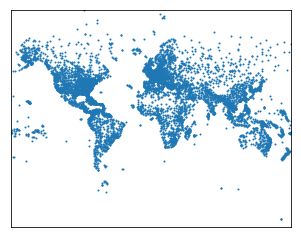

In [14]:
m.scatter(x, y, s=1)